In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t, f, multivariate_normal, norm
import numpy as np
import statsmodels.api as sm
from Linear_Reg_Diagnostic import Linear_Reg_Diagnostic
import statsmodels.stats.outliers_influence as smoi
from statsmodels.graphics.api import interaction_plot, qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson


In [71]:
data = pd.read_csv("http://www1.aucegypt.edu/faculty/hadi/RABE5/Data5/P229-30.txt",  delim_whitespace=True)


In [72]:
data

,Date,DJIA,Time
0,1/1/96,5117.12,1
1,1/2/96,5177.45,2
2,1/3/96,5194.07,3
3,1/4/96,5173.84,4
4,1/5/96,5181.43,5
...,...,...,...
257,12/25/96,6522.85,258
258,12/26/96,6546.68,259
259,12/27/96,6560.91,260
260,12/30/96,6549.37,261


In [73]:
model = sm.OLS.from_formula("Time ~ DJIA", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     756.5
Date:                Sun, 14 May 2023   Prob (F-statistic):           6.07e-79
Time:                        17:03:23   Log-Likelihood:                -1326.5
No. Observations:                 262   AIC:                             2657.
Df Residuals:                     260   BIC:                             2664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -930.2602     38.677    -24.052      0.0

<Axes: xlabel='Time', ylabel='DJIA'>

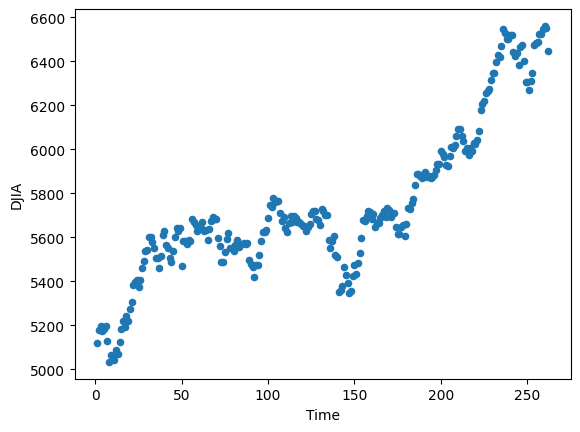

In [74]:
data.plot.scatter("Time", "DJIA")

it doesnt seem right.

sol 2:

In [113]:
prev = pd.Series(data['DJIA'][:-1].values, index=[i for i in range(1, 262)])

In [114]:
data['prev_DJIA'] = prev

In [115]:
data

,Date,DJIA,Time,prev_DJIA
0,1/1/96,5117.12,1,NaN
1,1/2/96,5177.45,2,5117.12
2,1/3/96,5194.07,3,5177.45
3,1/4/96,5173.84,4,5194.07
4,1/5/96,5181.43,5,5173.84
...,...,...,...,...
257,12/25/96,6522.85,258,6522.85
258,12/26/96,6546.68,259,6522.85
259,12/27/96,6560.91,260,6546.68
260,12/30/96,6549.37,261,6560.91


In [117]:
new_model = sm.OLS.from_formula("DJIA ~ prev_DJIA", data[1:]).fit()
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   DJIA   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.769e+04
Date:                Sun, 14 May 2023   Prob (F-statistic):          2.11e-240
Time:                        17:26:50   Log-Likelihood:                -1347.2
No. Observations:                 261   AIC:                             2698.
Df Residuals:                     259   BIC:                             2705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8984     42.989      0.858      0.3

In [119]:
durbin_watson(model.resid)

1.7586422163410815

we conclude that there is autocorrelation.

sol 3:

In [121]:
model3 = sm.OLS.from_formula("np.log(DJIA) ~ np.log(prev_DJIA)", data[1:]).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(DJIA)   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.674e+04
Date:                Sun, 14 May 2023   Prob (F-statistic):          2.34e-237
Time:                        17:33:37   Log-Likelihood:                 909.28
No. Observations:                 261   AIC:                            -1815.
Df Residuals:                     259   BIC:                            -1807.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0621      0.06

sol 5:

In [124]:
print(model3.f_test('Intercept = 0'))
print(model3.f_test('np.log(prev_DJIA) = 0'))
print(model3.f_test('Intercept = np.log(prev_DJIA) = 0'))

<F test: F=0.8754983125759896, p=0.3503092172029564, df_denom=259, df_num=1>
<F test: F=16743.314430618346, p=2.3426443570492623e-237, df_denom=259, df_num=1>
<F test: F=175883983.9466578, p=0.0, df_denom=259, df_num=2>


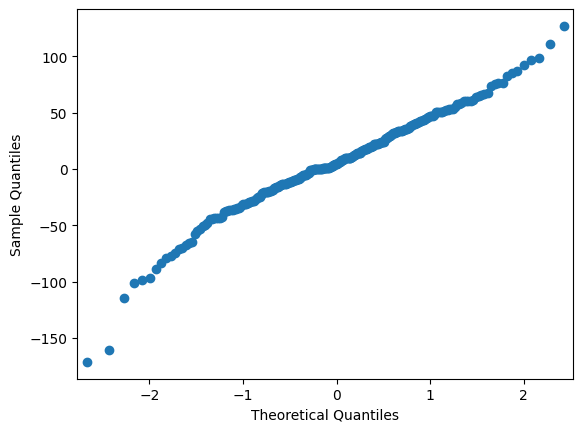

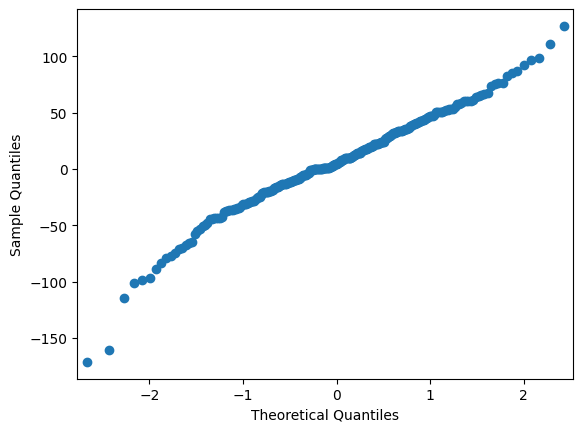

In [125]:
qqplot(data['DJIA'] - data['prev_DJIA'])

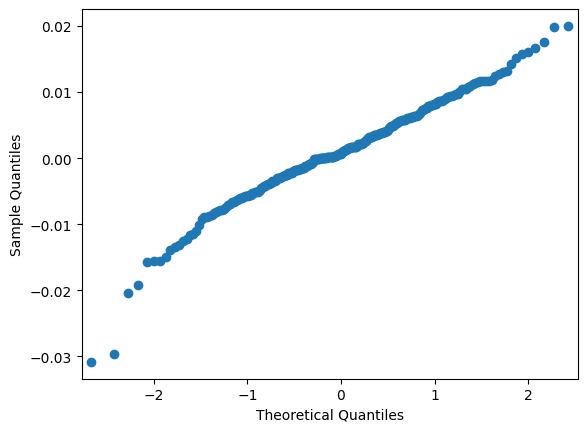

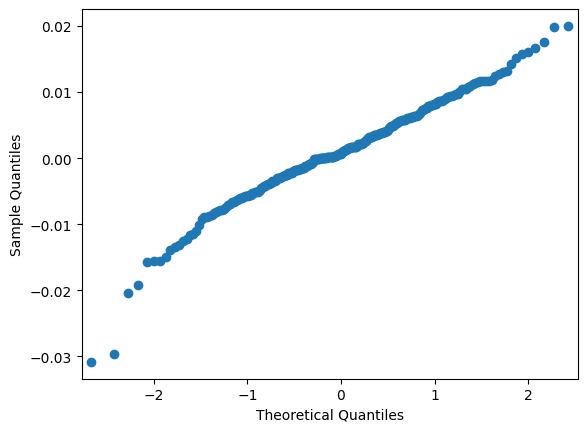

In [126]:
qqplot(np.log(data['DJIA']) - np.log(data['prev_DJIA']))

looks normal